In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('D:/projects/XAI-finance2/dataset/HELOC1-2.csv')
df

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NumTradesOpeninLast12M,PercentInstallTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,1,43,0,0,33,76,8,1,1,69
1,0,61,58,15,41,2,4,4,100,200,...,0,67,0,0,0,71,0,2,0,0
2,0,67,66,5,24,9,0,0,100,200,...,4,44,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,3,57,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,200,...,0,25,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,1,73,131,5,57,21,0,0,95,80,...,5,19,0,0,26,73,5,2,0,100
9857,0,65,147,39,68,11,0,0,92,28,...,0,42,1,1,86,53,2,2,1,80
9858,0,74,129,6,64,18,1,1,100,200,...,1,33,4,4,6,67,5,3,0,56
9859,0,72,234,12,113,42,2,2,96,35,...,0,20,0,0,19,65,4,1,0,38


In [3]:
# splitting dataframe by row index
traindf = df.iloc[:7800,:]
testdf = df.iloc[7800:,:]
print("Shape of new dataframes - {} , {}".format(traindf.shape, testdf.shape))


Shape of new dataframes - (7800, 23) , (2061, 23)


In [4]:
# Dividing Dataframe into target feature (Y) and predictor features (X)
X_train = traindf.iloc[:, 1:23].to_numpy()
y_train = traindf.iloc[:, 0].to_numpy()

X_test = testdf.iloc[:, 1:23].to_numpy()
y_test = testdf.iloc[:, 0].to_numpy()

In [5]:

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

In [6]:
np.save('D:/projects/XAI-finance2/matrices/X_train.npy', X_train)
np.save('D:/projects/XAI-finance2/matrices/X_test.npy', X_test)
np.save('D:/projects/XAI-finance2/matrices/y_test.npy', y_test)

# np.save('D:/projects/XAI-finance2/matrices/X_train_std.npy', X_train_std)
# np.save('D:/projects/XAI-finance2/matrices/X_test_std.npy', X_test_std)
# np.save('D:/projects/XAI-finance2/matrices/y_test.npy', y_test)

In [18]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, min_samples_split=10, max_depth=20) # MODEL WITH TUNED PARAMETERS
# clf = RandomForestClassifier(n_estimators=20) # n_estimators is the no. of trees in the random forest
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
y_predf = y_pred[:,1]>0.5 # change the string values in X?
#y_pred = y_pred.astype(int)

In [19]:
# Algorithm Evaluation
# print("Accuracy:",metrics.accuracy_score(y_test, y_predf))
y_test = np.array(y_test, dtype=bool)
from sklearn import metrics
print(type(y_test))
print(type(y_pred))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
print("Accuracy: ", acc)
print("Score: ", clf.score(X_test, y_test))
print("Classes: ", clf.classes_)


Accuracy:  0.7462396894711305
Score:  0.7462396894711305
Classes:  [0 1]


In [11]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=8, min_samples_split=5, max_depth=25 ) # MODEL WITH TUNED PARAMETERS
# clf = RandomForestClassifier(n_estimators=20) # n_estimators is the no. of trees in the random forest
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
y_predf = y_pred[:,1]>0.49999 # change the string values in X?
#y_pred = y_pred.astype(int)

In [12]:
acc = np.sum(np.logical_not(np.logical_xor(y_test, y_predf)))/len(y_test)
print("Accuracy: ", acc)
print("Score: ", clf.score(X_test, y_test))
print("Classes: ", clf.classes_)


Accuracy:  0.744784085395439
Score:  0.744784085395439
Classes:  [0 1]


# XGBOOST

In [47]:
pip install xgboost

  Using cached xgboost-1.7.4-py3-none-win_amd64.whl (89.1 MB)
Note: you may need to restart the kernel to use updated packages.Successfully installed xgboost-1.7.4



In [2]:
import xgboost as xgb


In [12]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [13]:
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
print("Accuracy of Model::",accuracy_score(y_test, predictions))

Accuracy of Model:: 0.7142163998059194


# Neural Network

### FFNN

In [7]:
# Dividing Dataframe into target feature (Y) and predictor features (X)
X_train = traindf.iloc[:, 1:23]
y_train = traindf.iloc[:, 0]

X_test = testdf.iloc[:, 1:23]
y_test = testdf.iloc[:, 0]

In [8]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.sparse
import os

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [9]:
RESULT_PATH = './results'

if not os.path.exists(RESULT_PATH):
        os.mkdir(RESULT_PATH)

In [10]:
#Model Creation

from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPool1D, Flatten, Input, concatenate, Dropout, Activation, BatchNormalization
from tensorflow.python.keras.regularizers import Regularizer as regularizers

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def get_FFNN_model(X, y, hidden_layers_size = [4]):
    """
        BASIC MODEL for the FF-NN
    """
    input_size = len(X.columns.values)
    #output_size = len(y.columns.values)
    output_size = y.size
    
    if len(hidden_layers_size) == 0:
        # No hidden layer (linear regression equivalent)
        ff_layers = [ Dense(output_size, input_shape=(input_size,), activation='softmax') ]
    else:
        # With sigmoid hidden layers        
        ff_layers = [
            tf.keras.layers.Dense(hidden_layers_size[0], input_shape=(input_size,), activation='sigmoid',
                  kernel_initializer='he_uniform',
#                   bias_initializer = 'zeros',
                  kernel_regularizer= tf.keras.regularizers.L1(0.001)
#                   ,activity_regularizer=regularizers.l2(0.001)
                 ),
            tf.keras.layers.BatchNormalization(),  # <- Batch normalisation layer
#             Dropout(0.3),
#             Dense(10, activation = 'sigmoid',
#                   kernel_initializer='ones',
#                   kernel_regularizer=regularizers.l1(0.005),
#                   activity_regularizer=regularizers.l2(0.001)
#                  ),
#             Dense(hidden_layers_size[0], input_shape=(input_size,), activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
#             Dense(hidden_layers_size[0], input_shape=(input_size,), activation='sigmoid', activity_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
#             tf.keras.layers.Dense(20, input_shape=(input_size,), activation='sigmoid'),
#             Activation('relu'),
            tf.keras.layers.Dense(1, activation='sigmoid') 
#             tf.keras.layers.Dense(output_size, activation='sigmoid') 
        ]
#         for hidden_size in hidden_layers_size[1:]:  
#             ff_layers.insert( -1,  Dense(hidden_size, activation='tanh') )
#             ff_layers.insert( -1,  Activation('relu') )
    print(ff_layers)
    model = tf.keras.models.Sequential(ff_layers)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.009),
                  loss='binary_crossentropy',
                  metrics=['accuracy',recall_m,precision_m])
    model.summary()
    return model


[<tensorflow.python.keras.layers.core.Dense object at 0x000001672DE4C7C0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000167383090D0>, <tensorflow.python.keras.layers.core.Dense object at 0x00000167383092B0>]


C:\Users\Khushali\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 281
Trainable params: 261
Non-trainable params: 20
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.63666, saving model to ./results\net_WOE_rudin.h5

Epoch 00002: val_loss did not improve from 0.63666

Epoch 00003: val_loss did not improve from 0.63666

Epoch 00004: val_loss improved from 0.63666 to 0.62981, saving model to ./results\net_WOE_rudin.h5

Epoch 00005: val_loss did not improve from 0.62981

Epoch 00006: val_loss did not impr


Epoch 00129: val_loss did not improve from 0.58938

Epoch 00130: val_loss did not improve from 0.58938

Epoch 00131: val_loss did not improve from 0.58938

Epoch 00132: val_loss did not improve from 0.58938

Epoch 00133: val_loss did not improve from 0.58938

Epoch 00134: val_loss did not improve from 0.58938

Epoch 00135: val_loss did not improve from 0.58938

Epoch 00136: val_loss did not improve from 0.58938

Epoch 00137: val_loss did not improve from 0.58938

Epoch 00138: val_loss did not improve from 0.58938

Epoch 00139: val_loss did not improve from 0.58938

Epoch 00140: val_loss did not improve from 0.58938

Epoch 00141: val_loss did not improve from 0.58938

Epoch 00142: val_loss did not improve from 0.58938

Epoch 00143: val_loss did not improve from 0.58938

Epoch 00144: val_loss did not improve from 0.58938

Epoch 00145: val_loss did not improve from 0.58938

Epoch 00146: val_loss did not improve from 0.58938

Epoch 00147: val_loss did not improve from 0.58938

Epoch 00148

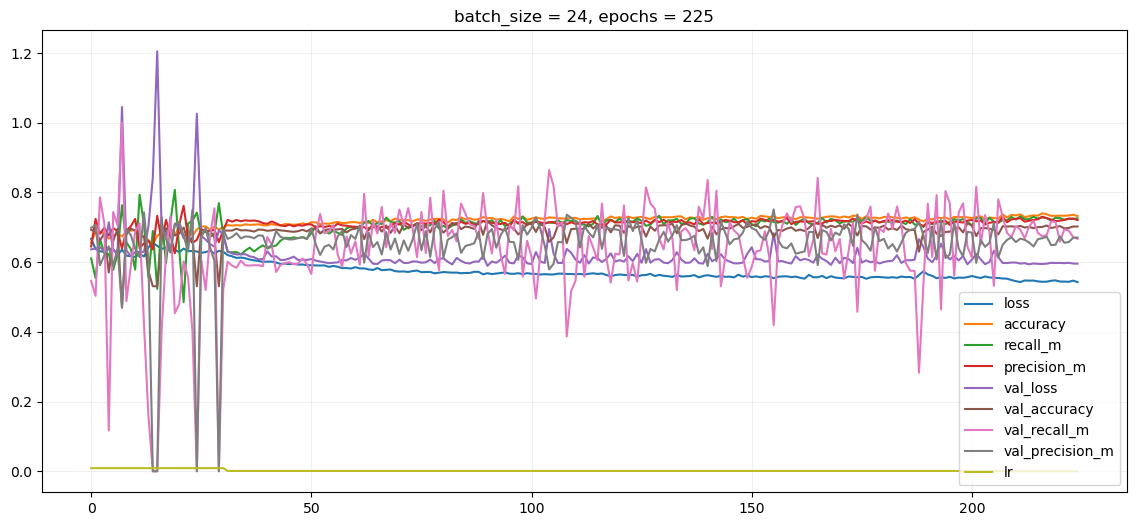

In [11]:
# Model training

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

EPOCHS = 225
PATIENCE = 50
BATCH_SIZE = 24

def net_train(model, bestmodel_path, X_train, y_train_onehot, X_validate, y_validate_onehot, epochs = EPOCHS):
    # Define four callbacks to use
    checkpointer = ModelCheckpoint(filepath = bestmodel_path, verbose = 2, save_best_only = True, save_weights_only=False)
    early_stopping = EarlyStopping(monitor = 'val_acc', patience = PATIENCE, mode = 'max')
    learning_rate_reduction = ReduceLROnPlateau(monitor = 'loss', factor = 0.1, patience = 20, verbose = 2)

    # Train the model
    history = model.fit(X_train, y_train_onehot, verbose = False, epochs=epochs, batch_size=BATCH_SIZE, 
                        callbacks=[
                            checkpointer,
#                             early_stopping, 
                            learning_rate_reduction
                        ], 
#                         validation_data=(X_validate, y_validate_onehot)
                        validation_split = 0.22
                       )

    return history


HIDDEN_LAYERS = [10]

model = get_FFNN_model(X_train, y_train, HIDDEN_LAYERS)

model_path = os.path.join(RESULT_PATH, 'net_WOE_rudin.h5')
forge_gen = True

if not os.path.exists(model_path) or forge_gen:
# if forge_gen:
    history = net_train(model, model_path, X_train, y_train, X_test, y_test)    
    
    score = model.evaluate(X_test, y_test)
    plt.figure(figsize=(14,6))
    for key in history.history.keys():
        plt.plot(history.history[key], label=key)
    plt.legend(loc='best')
    plt.grid(alpha=.2)
    plt.title(f'batch_size = {BATCH_SIZE}, epochs = {EPOCHS}')
    plt.draw()
else:
    print('Model loaded.')
    model.load_weights(model_path)


In [12]:
# scores = model.evaluate(X_onehot_train.values, y_onehot_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print("Training Set:", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# scores = model.evaluate(X_onehot_test.values, y_onehot_test)
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Test Set:", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

confusion_matrix(y_test, model.predict_classes(X_test), sample_weight=None)

Training Set: 
accuracy: 73.09%
Test Set: 
accuracy: 73.61%


C:\Users\Khushali\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[800, 228],
       [316, 717]], dtype=int64)

Accuracy metrics for different Optimizers:   

- SGD: 71.57% 
- Adam: 74.38% 
- RMSprop: 73.46%
- Adadelta: 67.30%
- Nadam: 73.41%


# SVM

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [8]:
# Dividing Dataframe into target feature (Y) and predictor features (X)
X_train = traindf.iloc[:, 1:23].to_numpy()
y_train = traindf.iloc[:, 0].to_numpy()

X_test = testdf.iloc[:, 1:23].to_numpy()
y_test = testdf.iloc[:, 0].to_numpy()

In [9]:
sc = StandardScaler()
sc.fit(X_train)

X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)

np.save('D:/projects/XAI-finance2/matrices/X_train_standard.npy', X_train_standard)
np.save('D:/projects/XAI-finance2/matrices/X_test_standard.npy', X_test_standard)


In [13]:
from sklearn.svm import SVC

SVM=SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0, probability=True)
SVM.fit(X_train_standard, y_train)
print(SVM.score(X_train_standard, y_train))
print(SVM.score(X_test_standard, y_test))


0.8007692307692308
0.7379912663755459


In [16]:
import joblib
filename= 'D:/projects/XAI-finance2/FinalModels/svm_pickle.pkl'
joblib.dump(SVM, filename)

['D:/projects/XAI-finance2/FinalModels/svm_pickle.pkl']